In [1]:
"""
Tom Segal 10.09.2020
Machine Learning digitRecognizer exercise
recognize hand-written digits with a ML model trained on the NMIST data set
Difficulties I encountered:
Anaconda:
Initially I could not get libraries such as Tensorflow to work. I had to reinstall Anaconda and Python as 64 bit
and create a new virtual environment. On this environment I could then install all the libraries except for sklearn.
I didn't find it because its actually called scikit-learn.
"""

"\nTom Segal 10.09.2020\nMachine Learning digitRecognizer exercise\nrecognize hand-written digits with a ML model trained on the NMIST data set\nDifficulties I encountered:\nAnaconda:\nInitially I could not get libraries such as Tensorflow to work. I had to reinstall Anaconda and Python as 64 bit\nand create a new virtual environment. On this environment I could then install all the libraries except for sklearn.\nI didn't find it because its actually called scikit-learn.\n"

In [60]:
import numpy as np
import pandas as pd
# import os
import seaborn as sns # for visualization

# machine learning
from keras.utils.np_utils import to_categorical # used to convert the digit labels to one-hot vectors
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator # used to augument the data
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split # used to split the train data into train and test
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # used for plotting the digits
import itertools # for plotting the confusion matrix

In [3]:
# check that the file paths exist
# print(os.path.isdir("digit-recognizer"))
# print(os.path.exists("digit-recognizer/train.csv"))

linesToRead = 42000 # the full number of rows is 42000
# linesToRead = 1000
pathTrain = 'digit-recognizer/train.csv'
pathTest = 'digit-recognizer/test.csv'
print("reading training data")
trainData = pd.read_csv(pathTrain , nrows = linesToRead)
print("reading testing data")
testData = pd.read_csv(pathTest , nrows = linesToRead)

# observing the first 5 columns of trainingDaAta. 785 columns - label (which digit 0 1 2 3 ... 9) and then 784 pixels (28x28)
print("first few columns of the training data:")
trainData.head(5)



reading training data
reading testing data
first few columns of the training data:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# observing the first 5 columns of testData. 785 columns - label (which digit 0 1 2 3 ... 9) and then 784 pixels (28x28)
print("first few columns of the testing data:")
testData.head(5)

first few columns of the testing data:


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# separate the data into x and y as in pixels and label
# regarding panda.drop: axis{0 or ‘index’, 1 or ‘columns’}, default 0
#   Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
trainDataX = trainData.drop(labels = ['label'] , axis = 1) 
print("first few columns of the x training data:")
trainDataX.head(5)



first few columns of the x training data:


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
trainDataY = trainData['label']
print("first few columns of the y training data:")
trainDataY.head(5)

first few columns of the y training data:


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
# delete trainData to free space
del trainData

<AxesSubplot:xlabel='label', ylabel='count'>

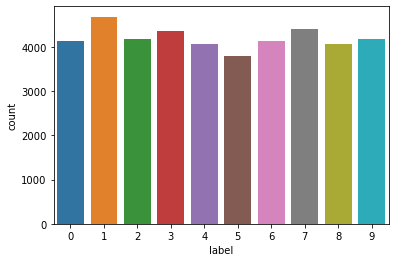

In [8]:
# plot how many digits we have of each type
sns.countplot(trainDataY)

In [9]:
# check for null entries
trainDataX.isnull() # shows the complete table with values replaced with True (null) or False (not)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# shows for each column in the table whether theres any row there at all containing a null value
trainDataX.isnull().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

In [11]:
""" DataFrame.count
Count number of non-NA/null observations.

DataFrame.max
Maximum of the values in the object.

DataFrame.min
Minimum of the values in the object.

DataFrame.mean
Mean of the values.

DataFrame.std
Standard deviation of the observations.

DataFrame.select_dtypes
Subset of a DataFrame including/excluding columns based on their dtype.

"""
trainDataX.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [12]:
# shows that there are 784 out of 784 False counts so theres no null values
# same for trainDataY
trainDataY.isnull().any()

False

In [13]:
# normalize the train data. This helps control for cases where the illumination is different
#   and in general it makes the algorithm converge much faster
trainDataX = trainDataX / 255
trainDataX.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# same for the test data
testData = testData / 255
testData.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# convert the train data to numpy arrays so we can reshape them.
# This removes the labels from the table columns.
trainDataX = trainDataX.values
# reshape the train data to 28x28 1 dimension (grayscale) images. I think -1 stands for all data
trainDataX = trainDataX.reshape(-1 , 28 , 28 , 1)
# now trainDataX is an array where each cell contains a 28x28 matrix

In [16]:
# same for the test data
testData = testData.values
# reshape the train data to 28x28 1 dimension (grayscale) images. I think -1 stands for all data
testData = testData.reshape(-1 , 28 , 28 , 1)
# now trainDataX is an array where each cell contains a 28x28 matrix

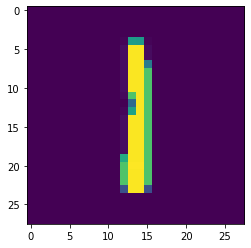

In [17]:
# plot a digit just to see how it looks like
 # the two : stand for all x and y values, the 0 stands for the first and only index of the color, because its grayscale
g1 = plt.imshow(trainDataX[2][:,:,0])



In [18]:
# turn trainDataY, a column vector showing the correct digit for each image, to a list of "one hot" vectors
#   these vectors are length 10 and contain only 0 except for 1 at the index of the corresponding digit
trainDataY = to_categorical(trainDataY)

In [19]:
# next we split our train data into train and validation.
# the data is split such that 0.1 = 10% of it it used for valiation. The random state is arbitrary chosen to be 19
# to have consistency over several runs
# if we would have seen above that the data distribution is not uniform we should have made sure here that the split
# is also uniform using stratify = True
# trainDataXSplit, validationDataX, trainDataYSplit, validationDataY = \
# train_test_split(trainDataX, trainDataY, test_size = 0.1, random_state = 19)
trainDataX, validationDataX, trainDataY, validationDataY =train_test_split(trainDataX, trainDataY, test_size=0.1,random_state=2)

In [20]:
# now for the machine learning part
# some useful documentation
# https://keras.io/api/layers/convolution_layers/convolution2d/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
# https://keras.io/api/layers/regularization_layers/dropout/
# https://keras.io/api/layers/reshaping_layers/flatten/

# start the sequence
model = Sequential()
# add a Conv2D layer with 32 filters (output filters), relu activation curve and a kernel size as in convolution window of 5,5.
# Note that the input shape is mentioned as this is the first layer
# padding results in even padding to all 4 sides ensuring that the dimensions of the input and the output are equal.
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
# add another identical Conv2D layer.
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# ownsamples the input representation by taking the maximum value over the window defined by pool_size
#   for each dimension along the features axis. 
model.add(MaxPool2D(pool_size=(2,2)))
"""
Applies Dropout to the input.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time,
which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate)
such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference.
When using model.fit, training will be appropriately set to True automatically,
and in other contexts, you can set the kwarg explicitly to True when calling the layer.

"""
model.add(Dropout(0.25))

# repeat the same thing but with smaller kernel sizes and strides for MaxPool2D which causes it to skip
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# convert the input to 1D
model.add(Flatten())
# add two Dense as in fully connected 1D layers, with a 50% dropout in-between.
# the output of the second is of size 10 because we have 10 digit types.
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [21]:
# Define the optimizer. It iterates over the parameters and reduces the loss function which is described below.
# https://keras.io/api/optimizers/rmsprop/
# lr = 0.001 is the default learning rate. higher learning rate means higher steps in the loss landscape and higher
#    convergence, however the sampling is then poorer and the probability to fall into a local minima is lower.
#    therefore the lr starts large and is periodically decreased by half every 3 steps if accuracy is not improved
# using ReduceLROnPlateau
# rho: Discounting factor for the history/coming gradient. Defaults to 0.9.

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [22]:
# compile the ML model. Use the above-defined optimizer with the categorical_crossentropy loss.
# the loss is the difference between the predicted and the actual classifications.
# the metrics model is used to evaluate the accuracy of the model at the test stage, not at the train stage
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [26]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 3 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [27]:
# augument the data
# we will artificially increase our data set size by adding random variations to our data set.
# this makes it more robust and less prone to overfitting.
# here it was chosen to rotate images by 10 degrees, shift them in all 4 directions by up to 10% and scale them by 10%.
# flipping is problematic here because of 6 and 9 and so on.
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(trainDataX)


In [28]:
# Fit the model
print(trainDataX.shape)
print(trainDataY.shape)
print(validationDataX.shape)
print(validationDataY.shape)
print(trainDataX.shape[0])
history = model.fit_generator(datagen.flow(trainDataX,trainDataY, batch_size=batch_size),
                              epochs = epochs, validation_data = (validationDataX,validationDataY),
                              verbose = 2, steps_per_epoch=trainDataX.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)
37800
Epoch 1/3
 - 92s - loss: 0.1261 - accuracy: 0.9628 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 2/3
 - 97s - loss: 0.0935 - accuracy: 0.9730 - val_loss: 0.0400 - val_accuracy: 0.9869
Epoch 3/3
 - 99s - loss: 0.0789 - accuracy: 0.9772 - val_loss: 0.0354 - val_accuracy: 0.9895


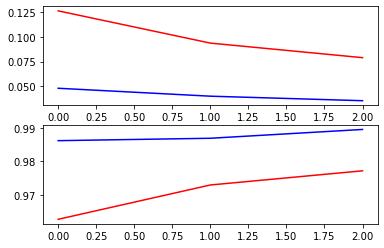

In [29]:
# next the loss and accuracy will be plotted as a function of the epochs
fix, ax = plt.subplots(2,1)

# the loss is the error rate between the labels observed and predicted
ax[0].plot(history.history['loss'], color = "r", label = "training data loss")
ax[0].plot(history.history['val_loss'], color = "b" , label = "validation data loss", axes = ax[0])

# the accuracy is similar to the loss function but its only calculated from the validation data?
ax[1].plot(history.history['accuracy'], color="r", label = "training data accuracy")
ax[1].plot(history.history['val_accuracy'], color="b", label = "validation data accuracy")


[0 1 2 3 4 5 6 7 8 9]


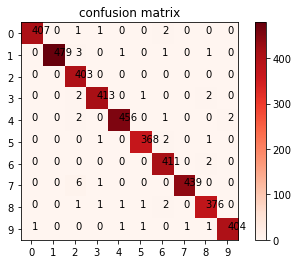

In [61]:
# note that the validation data accuracy is higher than the training data accuracy, which suggests that we are not overfitting
# I guess the inverse relation in the losses graph suggests the same

# next draw a confusion matrix
yReal = np.argmax(validationDataY, axis = 1)
yPredicted = model.predict(validationDataX) # get the predictions for the evaluation data
yPredictedOneHot = np.argmax(yPredicted, axis = 1)
myConfusionMatrix = confusion_matrix(yReal,yPredictedOneHot)
# plot it
plt.imshow(myConfusionMatrix, interpolation='nearest', cmap = plt.cm.Reds)
plt.title("confusion matrix")
plt.colorbar() # creates the vertical bar on the right
tick_marks = np.arange(10)
print(tick_marks)
plt.xticks(tick_marks, range(10)) # x axis
plt.yticks(tick_marks,range(10)) # y axis
# fill the cells with numbers
for i,j in itertools.product(range(myConfusionMatrix.shape[0]) , range(myConfusionMatrix.shape[1])):
    plt.text(j,i,myConfusionMatrix[i,j])

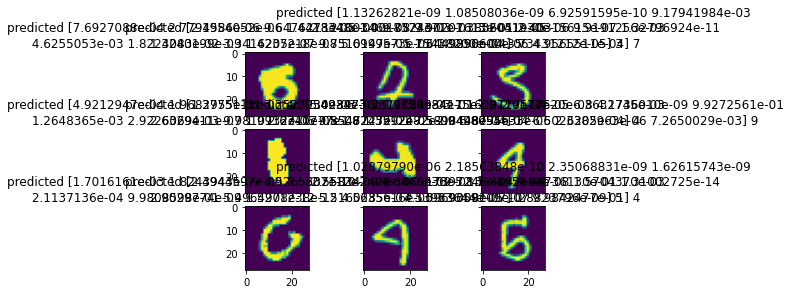

In [72]:
# we see that the main diagonal is dominant as expected. It seems that the digit "2" is often misinterpreted as a "7".
# next display the error results
errors = (yPredictedOneHot - yReal != 0) # true if there was a difference, false otherwise
yPredictedErrors = yPredicted[errors] # only takes the ones where there was an error
yRealErrors = yReal[errors]
validationDataXErrors = validationDataX[errors]

# probabilities of the digits wrongly predicted
yPredictedErrorsProbabilities = np.max(yPredictedErrors,axis=1)
# probabilities of the true values in the error set
trueProbabilityErrors = np.diagonal(np.take(yPredictedErrors,yRealErrors,axis=1))
# their difference
deltaPredictedTrueErrors = yPredictedErrorsProbabilities - trueProbabilityErrors
# sorted
sortedDelta = np.argsort(deltaPredictedTrueErrors)
# top 25
mostImportantErrors = sortedDelta[-9:]

# plot
n = 0
nrows = 3
ncols = 3
fix , ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
    for col in range(ncols):
        error = mostImportantErrors[n]
        ax[row,col].imshow((validationDataXErrors[error]).reshape((28,28)))
        ax[row,col].set_title("predicted {} {} ".format(yPredictedErrors[error],yRealErrors[error]))
        n +=1